In [49]:
# all the imports
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import fftshift


# Thimo's
import requests
import random as rnd
import datetime, time
import re

import numpy as np

ModuleNotFoundError: No module named 'scipy.fft'

First, the noise produced by the function generator has to be determined. For this, we chose different settings with varying attenuation [0 dB, 20 dB, 40 dB] and frequencies [5 Hz, 40 Hz]. The displayed sinus' are the result using the Voltcraft FG-506 function generator in combination with a Rhode & Scharz Oscillator HMO 1524. Due to the update/save implementation of the oscillator, some sudden jumps could not be prevented (eg. TRC04.csv).


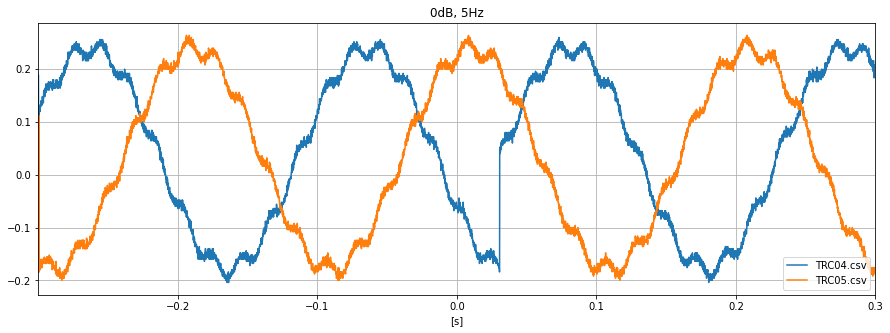

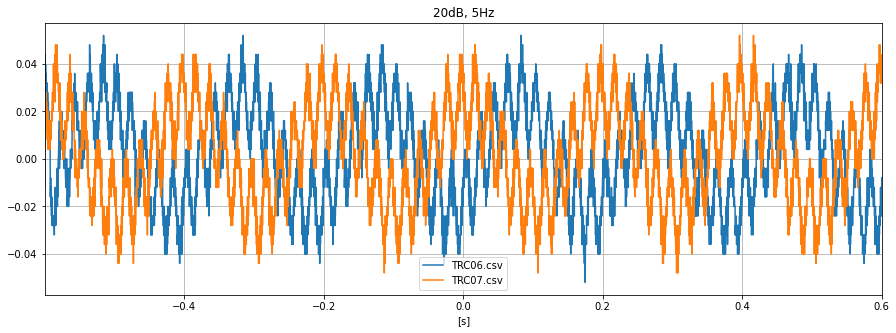

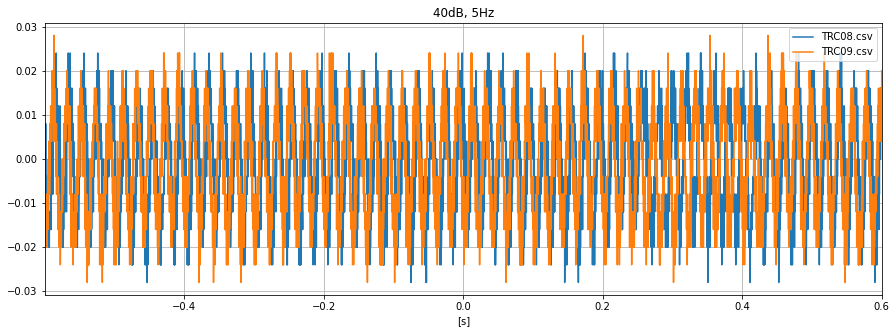

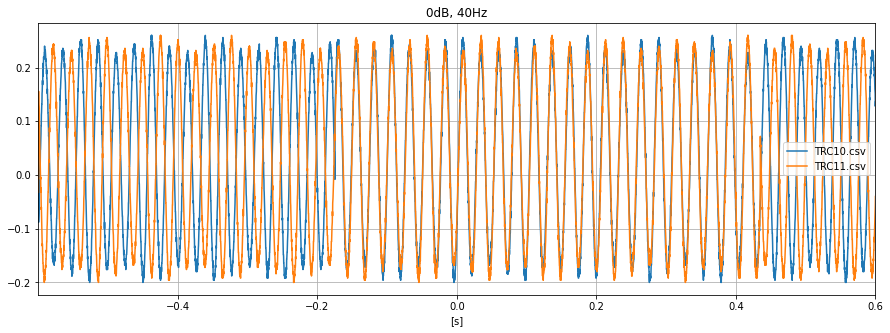

In [2]:
def display_two_complete(filename1, filename2, title):
    '''
    Displays the two rounds of test we need with each setting combination in a graph
    -------------------------------------------------------------------------------
    filename1 (string): name of the first file as a string, has to be in same folder
    filename2 (string): name of the second file as a string, has to be in same folder
    title (string): specification of attenuation and frequency 
    '''
    df1 = pd.read_csv(filename1, index_col=0).rename(columns = {'CH1[V]':filename1})
    df2 = pd.read_csv(filename2, index_col=0).rename(columns = {'CH1[V]':filename2})
    df = df1.join(df2[filename2])
    df.plot(y=[filename1,filename2], use_index = True, grid=True , title = title, figsize=(15,5))
    
display_two_complete('TRC04.csv','TRC05.csv', "0dB, 5Hz" )
display_two_complete('TRC06.csv','TRC07.csv', "20dB, 5Hz")
display_two_complete('TRC08.csv','TRC09.csv', "40dB, 5Hz")
display_two_complete('TRC10.csv','TRC11.csv', "0dB, 40Hz")

The noise level of all sinus' is high, the curve is not crystal clear and that's a problem. The reason might be the electronic noise from the powerline or the train. Not too great because testing how much noise the Traumschreiber produces/measures is difficult if there is so much noise to begin with. But we can take the difference and get the absolut value. Nice, nice. Cool, cool. Let's do that!  

C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_t

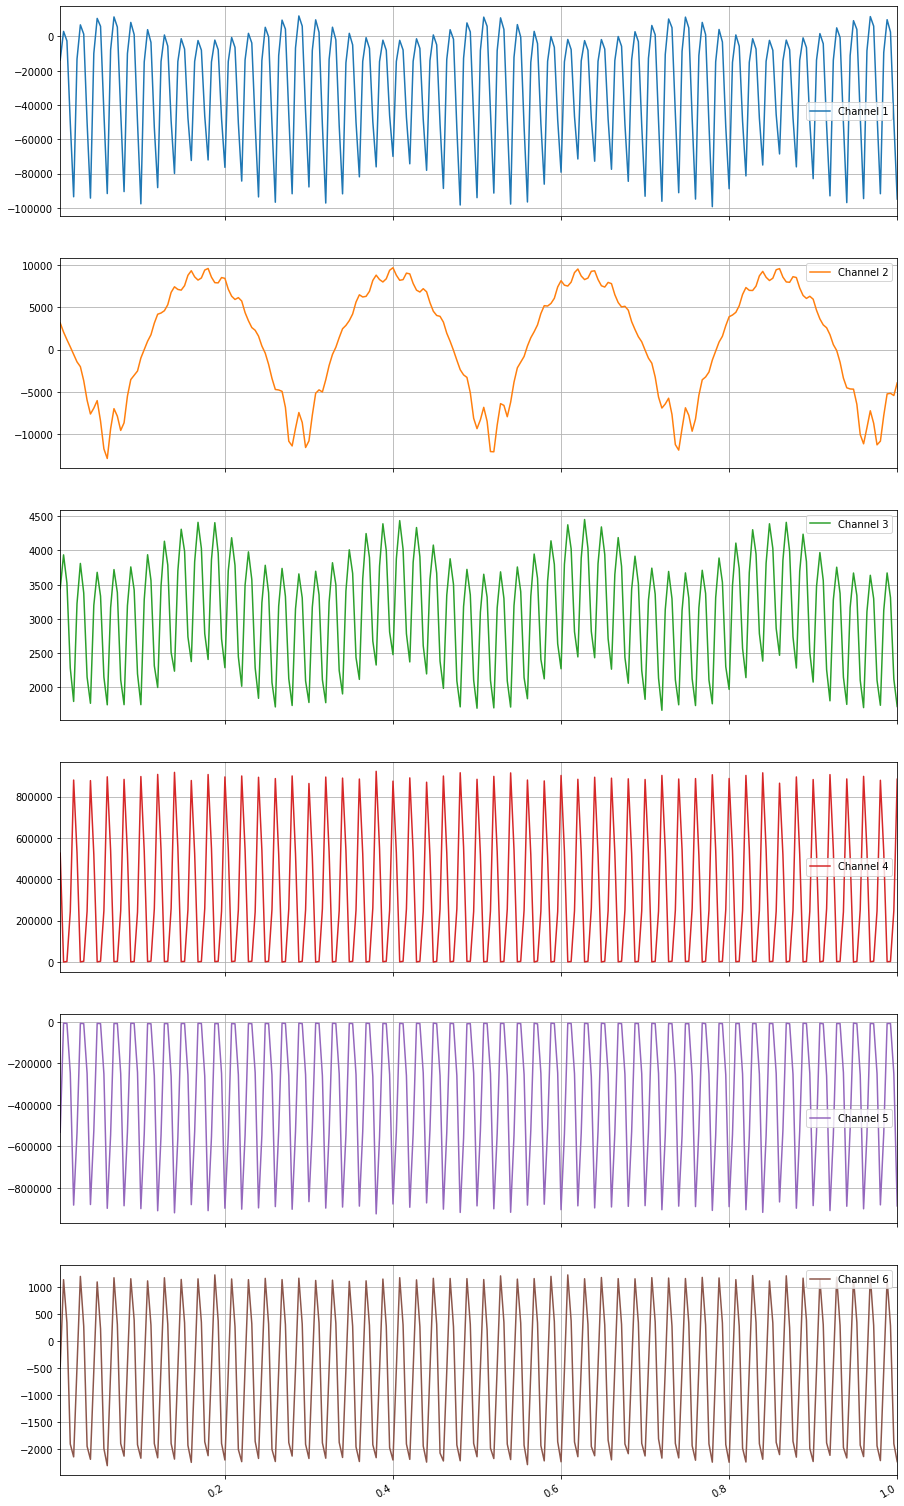

In [123]:
# import the data we measured with the Traumschreiber

TodaysExp =  pd.read_csv("test2.csv")#, index_col=0)

exp2 =  pd.read_csv("20200709-12h01EEGrecording.csv")
exp3 =  pd.read_csv("20200709-12h04EEGrecording.csv")
exp4 =  pd.read_csv("20200709-12h12EEGrecording.csv")
exp5 =  pd.read_csv("20200709-12h23EEGrecording.csv")
exp6 =  pd.read_csv("20200709-12h25EEGrecording.csv")
exp7 =  pd.read_csv("20200709-12h31EEGrecording.csv")
exp8 =  pd.read_csv("20200709-12h34EEGrecording.csv")
exp9 =  pd.read_csv("20200709-12h43EEGrecording.csv")


# find out what channels are actually displayed 
# maybe devide evrything by 298 (nV) 
# tidy up overleaf file
# read thomas' code
# repeat the whole experiment with Paria's board
# Test the App
def displayAllTheChannels(file):
    file = file.loc[0.004:1.004]
    file.rename(columns={'Unnamed: 1':'Channel 1', 'Unnamed: 2':'Channel 2', 'Unnamed: 3':'Channel 3', 'Unnamed: 4':'Channel 4', 'Unnamed: 5':'Channel 5', 'Unnamed: 6':'Channel 6'}, inplace=True )
    file.plot(y=["Channel 1", "Channel 2" , "Channel 3" , "Channel 4" , "Channel 5", "Channel 6" ], grid=True , figsize=(15,30), subplots=True, layout=(6,1))


exp9.head()    

displayAllTheChannels(exp9)

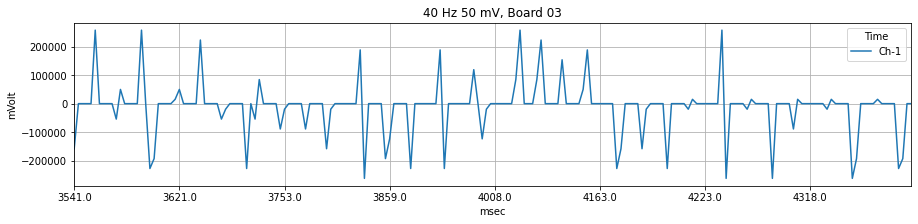

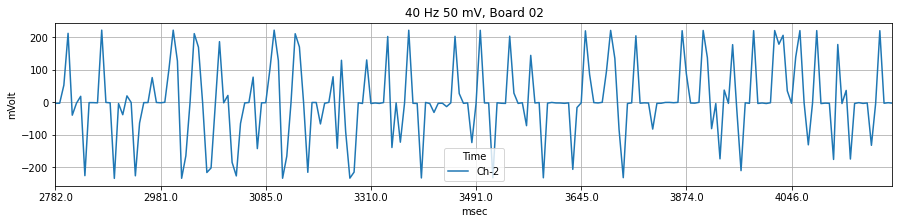

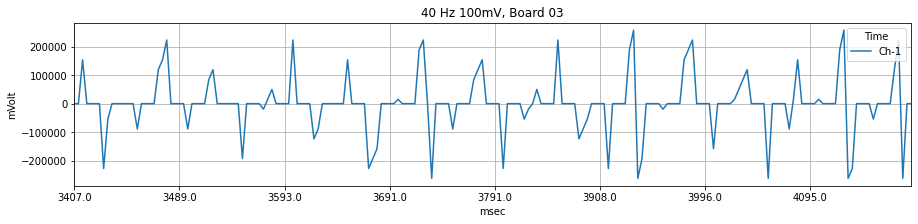

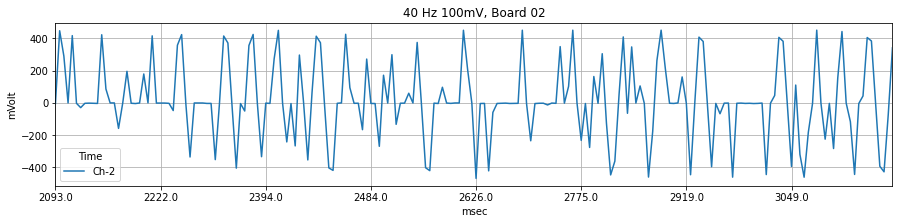

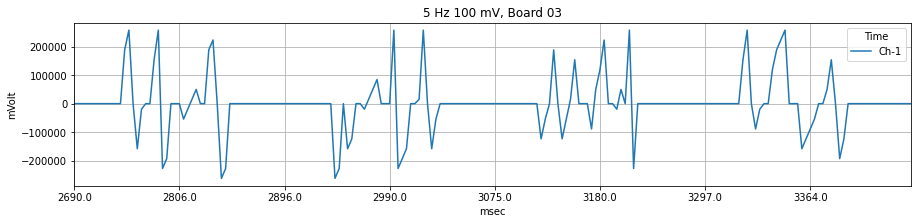

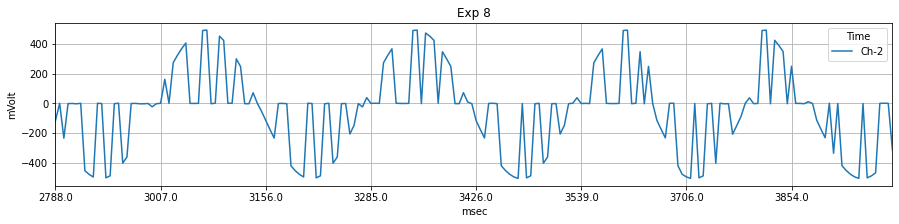

In [151]:

def tidyTSAppOutput(file, sec = False):
    
    # tidies the App Output to better plot in the next steps
    # if sec is true, the index is converted into seconds. 
    # But this changes the visualization in the plot later on a little to the worse
    file = file.iloc[1:]
    file.columns = file.iloc[0]
    file = file[1:].apply(pd.to_numeric, errors='ignore')
    # to set index to seconds and not miliseconds
    if sec:
        sec_index = file.index[:].tolist()
        sec_index = [float(i) for i in sec_index]
        sec_index[:] = [x / 1000 for x in sec_index] #converts 
        file.index = sec_index
    
    return file

def plot_trace(df, channelname, fro = 300, to = 500, sec=False, title = "Experiment", save = False):
    ax = df.iloc[fro:to].plot(y = channelname, grid = True, title = title, figsize=(15,3))
    if sec:
        ax.set_xlabel("s")
    else:
        ax.set_xlabel("msec")
    ax.set_ylabel("mVolt")   
    if save:    
        plt.savefig(title+'.png')
# df = tidyTSAppOutput(pd.read_csv("16-07-2020_15-12-09_Exp2.csv"))
# plot_trace(df, ["Ch-2"], title = "Experiment 2")



# df1 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-01-54_Exp1.csv"))
# plot_trace(df1, ["Ch-1"], title = "Experiment 1")
# df1_1 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-08-33_Exp1_1.csv"))
# plot_trace(df1_1, ["Ch-1"], title = "Experiment 1_1")
# df2 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-12-09_Exp2.csv"))
# plot_trace(df2, ["Ch-2"], title = "Experiment 2", save = True)

# df3 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-14-43_Exp3.csv"))
# plot_trace(df3, ["Ch-3"], title = "Experiment 3", save = True)


# df4_1 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-19-10_Exp4_1.csv"))
# plot_trace(df4_1, ["Ch-4"], title = "Experiment 4.1")
# df7 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-26-21_Exp7.csv"))
# plot_trace(df7, ["Ch-1"], title = "Experiment 7")
# df8 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-28-01_Exp8.csv"))
# plot_trace(df8, ["Ch-2"], title = "Experiment 8")
# df13 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-46-27_Exp13 .csv"))
# plot_trace(df13, ["Ch-1"], title = "Experiment 13")
# df14 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-49-41_Exp14 .csv"))
# plot_trace(df14, ["Ch-2"], title = "Experiment 14")
# df19 = tidyTSAppOutput(pd.read_csv("16-07-2020_16-36-46_Exp19.csv"))
# plot_trace(df19, ["Ch-1"], title = "Experiment 19")
# df20 = tidyTSAppOutput(pd.read_csv("16-07-2020_16-39-03_Exp20 .csv"))
# plot_trace(df20, ["Ch-2"], title = "Experiment 20")
# df25 = tidyTSAppOutput(pd.read_csv("16-07-2020_17-07-41_Exp25.csv"))
# plot_trace(df25, ["Ch-1"], title = "Experiment 25")
# df26 = tidyTSAppOutput(pd.read_csv("16-07-2020_17-10-06_Exp26.csv"))
# plot_trace(df26, ["Ch-1"], title = "Experiment 26", )

df27 = tidyTSAppOutput(pd.read_csv("17-07-2020_16-12-52_exp27 .csv"))
plot_trace(df27, ["Ch-1"], title = "40 Hz 50 mV, Board 03", save = True)


df20 = tidyTSAppOutput(pd.read_csv("16-07-2020_16-39-03_Exp20 .csv"))
plot_trace(df20, ["Ch-2"], title = "40 Hz 50 mV, Board 02")

df28 = tidyTSAppOutput(pd.read_csv("17-07-2020_15-57-02_Exp28 .csv"))
plot_trace(df28, ["Ch-1"], title = "40 Hz 100mV, Board 03", save = True)
df14 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-49-41_Exp14 .csv"))
plot_trace(df14, ["Ch-2"], title = "40 Hz 100mV, Board 02")

df29 = tidyTSAppOutput(pd.read_csv("17-07-2020_15-55-36_Exp29 .csv"))
plot_trace(df29, ["Ch-1"], title = "5 Hz 100 mV, Board 03", save = True)

df8 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-28-01_Exp8.csv"))
plot_trace(df8, ["Ch-2"], title = "Exp 8", save = True)

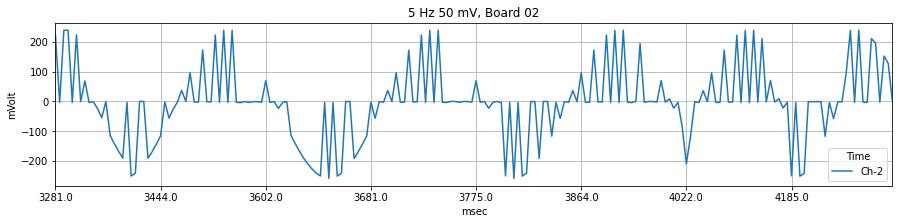

In [149]:
df2 = tidyTSAppOutput(pd.read_csv("16-07-2020_15-12-09_Exp2.csv"))
plot_trace(df2, ["Ch-2"], title = "5 Hz 50 mV, Board 02")



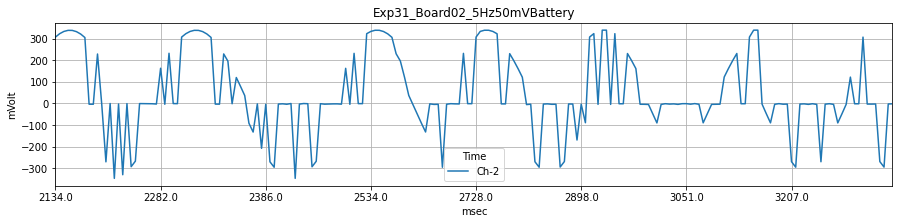

In [153]:
df31 = tidyTSAppOutput(pd.read_csv("17-07-2020_15-27-30_Exp31.csv"))
plot_trace(df31, ["Ch-2"], title = "Exp31_Board02_5Hz50mVBattery")

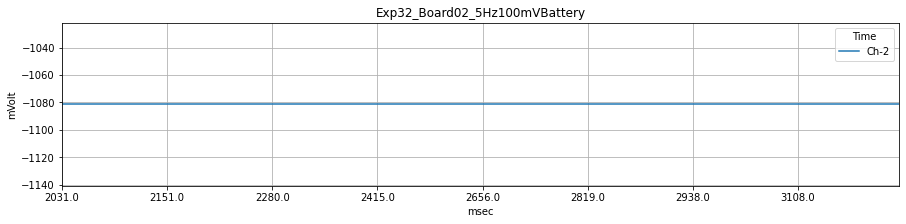

In [159]:
df32 = tidyTSAppOutput(pd.read_csv("17-07-2020_17-30-50_Exp32.csv"))
plot_trace(df32, ["Ch-2"], title = "Exp32_Board02_5Hz100mVBattery")